In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

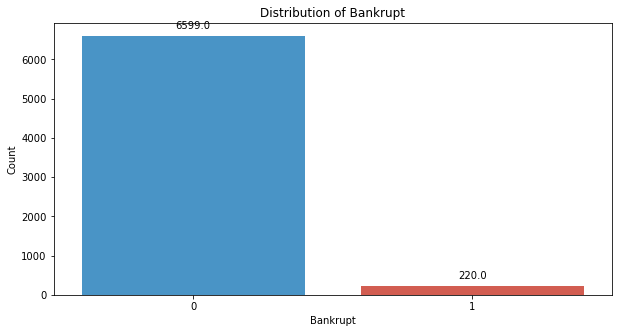

In [4]:
#Distribution representation
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=df['Bankrupt?'], data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [5]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [6]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

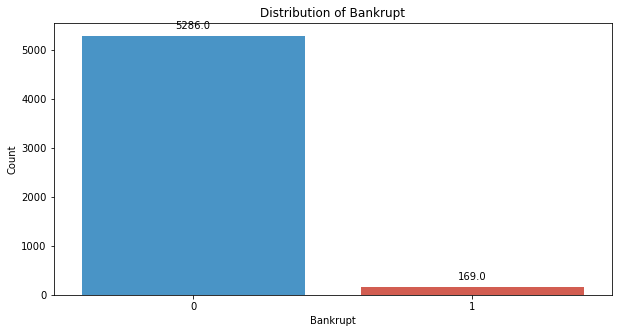

In [7]:
#Distribution representation
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [8]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<H1>SMOTE</H1>

In [9]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

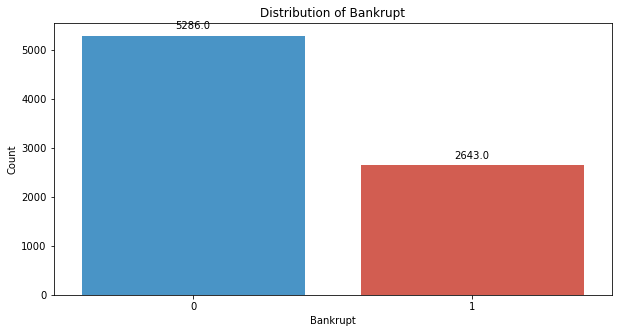

In [10]:
#Distribution representation
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train_resampled, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

<H1>POLYNOMIAL</H1>

In [11]:
svm_classifier_poly = SVC(kernel='poly', random_state=42)

In [12]:
svm_classifier_poly.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly', random_state=42)

In [13]:
y_val_pred_poly = svm_classifier_poly.predict(X_val)

In [14]:
# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_poly)
precision = precision_score(y_val, y_val_pred_poly)
recall = recall_score(y_val, y_val_pred_poly)
f1_value = f1_score(y_val, y_val_pred_poly)
val_report = classification_report(y_val, y_val_pred_poly)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.8577712609970675
Precision 0.06741573033707865
Recall 0.3
F1 Score 0.11009174311926605
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       662
           1       0.07      0.30      0.11        20

    accuracy                           0.86       682
   macro avg       0.52      0.59      0.52       682
weighted avg       0.95      0.86      0.90       682



In [15]:
conf_matrix = confusion_matrix(y_val, y_val_pred_poly)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[579  83]
 [ 14   6]]


In [16]:
y_test_pred_poly = svm_classifier_poly.predict(X_test)

In [17]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_poly)
precision = precision_score(y_test, y_test_pred_poly)
recall = recall_score(y_test, y_test_pred_poly)
f1_value = f1_score(y_test, y_test_pred_poly)
test_report = classification_report(y_test, y_test_pred_poly)

print("Accuracy", test_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Test Classification Report:\n", test_report)

Accuracy 0.8695014662756598
Precision 0.11842105263157894
Recall 0.2903225806451613
F1 Score 0.16822429906542055
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       651
           1       0.12      0.29      0.17        31

    accuracy                           0.87       682
   macro avg       0.54      0.59      0.55       682
weighted avg       0.93      0.87      0.89       682



In [18]:
conf_matrix = confusion_matrix(y_test, y_test_pred_poly)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[584  67]
 [ 22   9]]


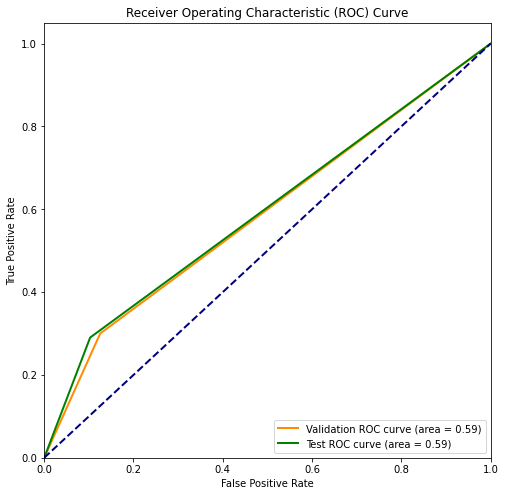

In [19]:
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_poly)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_poly)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<H1>RBF</H1>

In [20]:
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)

In [21]:
svm_classifier_rbf.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [22]:
y_val_pred_rbf = svm_classifier_rbf.predict(X_val)

In [23]:
# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_rbf)
precision = precision_score(y_val, y_val_pred_rbf)
recall = recall_score(y_val, y_val_pred_rbf)
f1_value = f1_score(y_val, y_val_pred_rbf)
val_report = classification_report(y_val, y_val_pred_rbf)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.8665689149560117
Precision 0.12631578947368421
Recall 0.6
F1 Score 0.20869565217391306
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       662
           1       0.13      0.60      0.21        20

    accuracy                           0.87       682
   macro avg       0.56      0.74      0.57       682
weighted avg       0.96      0.87      0.91       682



In [24]:
conf_matrix = confusion_matrix(y_val, y_val_pred_rbf)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[579  83]
 [  8  12]]


In [25]:
y_test_pred_rbf = svm_classifier_rbf.predict(X_test)

In [26]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_rbf)
precision = precision_score(y_test, y_test_pred_rbf)
recall = recall_score(y_test, y_test_pred_rbf)
f1_value = f1_score(y_test, y_test_pred_rbf)
test_report = classification_report(y_test, y_test_pred_rbf)

print("Accuracy", test_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Test Classification Report:\n", test_report)

Accuracy 0.8680351906158358
Precision 0.10666666666666667
Recall 0.25806451612903225
F1 Score 0.1509433962264151
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       651
           1       0.11      0.26      0.15        31

    accuracy                           0.87       682
   macro avg       0.53      0.58      0.54       682
weighted avg       0.92      0.87      0.89       682



In [27]:
conf_matrix = confusion_matrix(y_test, y_test_pred_rbf)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[584  67]
 [ 23   8]]


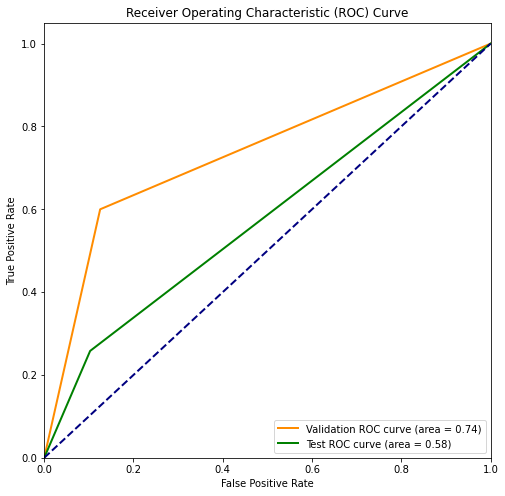

In [28]:
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_rbf)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_rbf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<H1>SIGMOID</H1>

In [29]:
svm_classifier_sigmoid = SVC(kernel='sigmoid', random_state=42)

In [30]:
svm_classifier_sigmoid.fit(X_train_resampled, y_train_resampled)

SVC(kernel='sigmoid', random_state=42)

In [31]:
y_val_pred_sigmoid = svm_classifier_sigmoid.predict(X_val)

In [32]:
# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_sigmoid)
precision = precision_score(y_val, y_val_pred_sigmoid)
recall = recall_score(y_val, y_val_pred_sigmoid)
f1_value = f1_score(y_val, y_val_pred_sigmoid)
val_report = classification_report(y_val, y_val_pred_sigmoid)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.5894428152492669
Precision 0.022058823529411766
Recall 0.3
F1 Score 0.04109589041095891
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.60      0.74       662
           1       0.02      0.30      0.04        20

    accuracy                           0.59       682
   macro avg       0.49      0.45      0.39       682
weighted avg       0.94      0.59      0.72       682



In [33]:
conf_matrix = confusion_matrix(y_val, y_val_pred_sigmoid)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[396 266]
 [ 14   6]]


In [34]:
y_test_pred_sigmoid = svm_classifier_sigmoid.predict(X_test)

In [35]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred_sigmoid)
precision = precision_score(y_test, y_test_pred_sigmoid)
recall = recall_score(y_test, y_test_pred_sigmoid)
f1_value = f1_score(y_test, y_test_pred_sigmoid)
test_report = classification_report(y_test, y_test_pred_sigmoid)

print("Accuracy", test_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Test Classification Report:\n", test_report)

Accuracy 0.6217008797653959
Precision 0.04048582995951417
Recall 0.3225806451612903
F1 Score 0.07194244604316546
Test Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.76       651
           1       0.04      0.32      0.07        31

    accuracy                           0.62       682
   macro avg       0.50      0.48      0.42       682
weighted avg       0.91      0.62      0.73       682



In [36]:
conf_matrix = confusion_matrix(y_test, y_test_pred_sigmoid)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[414 237]
 [ 21  10]]


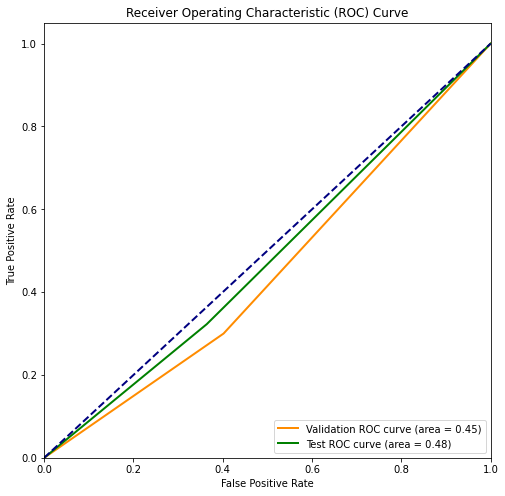

In [37]:
# Compute ROC curve and ROC area for each class
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_sigmoid)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_sigmoid)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<H1>LINEAR</H1>

In [38]:
svm_classifier_linear = SVC(kernel='linear', random_state=42)